In [1]:
!python --version

Python 2.7.14 :: Anaconda, Inc.


In [2]:
# Import dataset

import pandas as pd

df=pd.read_csv('~/Machine_Learning_101/3_Suervised_Learning_Decision_Tree/playornot.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
outlook        14 non-null object
temperature    14 non-null object
humidity       14 non-null object
windy          14 non-null bool
play           14 non-null object
dtypes: bool(1), object(4)
memory usage: 534.0+ bytes


In [3]:
df

,outlook,temperature,humidity,windy,play
0,sunny,hot,high,False,No
1,sunny,hot,high,True,No
2,overcast,hot,high,False,Yes
3,rainy,mild,high,False,Yes
4,rainy,cool,normal,False,Yes
5,rainy,cool,normal,True,No
6,overcast,cool,normal,True,Yes
7,sunny,mild,high,False,No
8,sunny,cool,high,False,Yes
9,rainy,mild,normal,False,Yes


In [4]:
# Convert data

y_mapdict = {'Yes': 1, 'No': 0}
y = df['play'].map(y_mapdict)
print (y.head())

windy_mapdict ={True:1,False:0}
df['windy'] = df['windy'].map(windy_mapdict)

outlook_mapdict={'sunny':0, 'overcast':1, 'rainy':2}
df['outlook']=df['outlook'].map(outlook_mapdict)

temperature_mapdict={'hot':0, 'mild':1, 'cool':2}
df['temperature']=df['temperature'].map(temperature_mapdict)

humidity_mapdict={'high':0, 'normal':1}
df['humidity']=df['humidity'].map(humidity_mapdict)

print df

0    0
1    0
2    1
3    1
4    1
Name: play, dtype: int64
    outlook  temperature  humidity  windy play
0         0            0         0      0   No
1         0            0         0      1   No
2         1            0         0      0  Yes
3         2            1         0      0  Yes
4         2            2         1      0  Yes
5         2            2         1      1   No
6         1            2         1      1  Yes
7         0            1         0      0   No
8         0            2         0      0  Yes
9         2            1         1      0  Yes
10        0            1         1      1  Yes
11        1            1         0      1  Yes
12        1            0         1      0  Yes
13        2            1         0      1   No


Entropy Formula
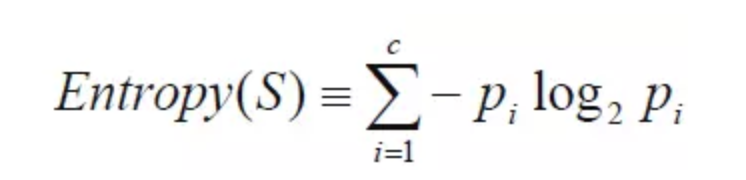

In [10]:
# Entropy
prob1 = pd.value_counts(df['play']) / len(df['play'])
import numpy as np
e_play = sum(np.log2(prob1)*prob1*(-1))
print e_play

0.940285958671


### Information Gain 

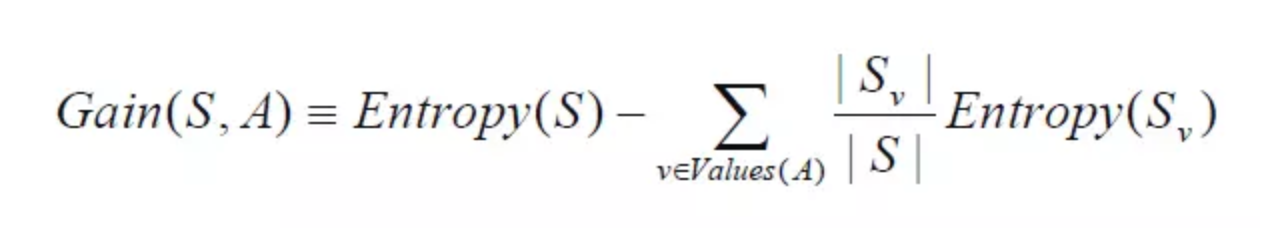

2nd part is Conditional entropy

In [13]:
def ent(data):
    prob1 = pd.value_counts(data) / len(data)
    return sum(np.log2(prob1) * prob1 * (-1))

def gain(feature):
    e1 = df.groupby(feature).apply(lambda x:ent(x['play']))
    p1 = pd.value_counts(df[feature]) / len(df[feature])
    e2 = sum (e1*p1)
    gain_value = e_play - e2
    return gain_value


In [14]:
print ('outlook_gain_value: ', gain('outlook'))
print ('windy_gain_value: ', gain('windy'))
print ('temperature_gain_value: ', gain('temperature'))
print ('humidity_gain_value: ', gain('humidity'))

('outlook_gain_value: ', 0.24674981977443933)
('windy_gain_value: ', 0.04812703040826949)
('temperature_gain_value: ', 0.02922256565895487)
('humidity_gain_value: ', 0.09027634939276519)


#### According to above information gain value

we could get:

Outlook gain value is the biggest one, which means 

In [17]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(df[['outlook','temperature','humidity','windy']],y,train_size=0.8)

/Users/sijia.li/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [18]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(train_x,train_y)
# Testing
predtest_y=model.predict(test_x)
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(test_y,predtest_y)

0.6666666666666666

In [19]:
import graphviz # doctest: +SKIP
from sklearn import tree
dot_data = tree.export_graphviz(model, out_file=None) # doctest: +SKIP
graph = graphviz.Source(dot_data) # doctest: +SKIP
graph.render("tree") # doctest: +SKIP


dot_data = tree.export_graphviz(model, out_file=None, # doctest: +SKIP
                            feature_names=list(train_x),  # doctest: +SKIP
                            class_names='PlayOrNotplay',  # doctest: +SKIP
                            filled=True, rounded=True,  # doctest: +SKIP
                            special_characters=True)  # doctest: +SKIP
graph = graphviz.Source(dot_data)  # doctest: +SKIP
graph.view() # doctest: +SKIP


'Source.gv.pdf'

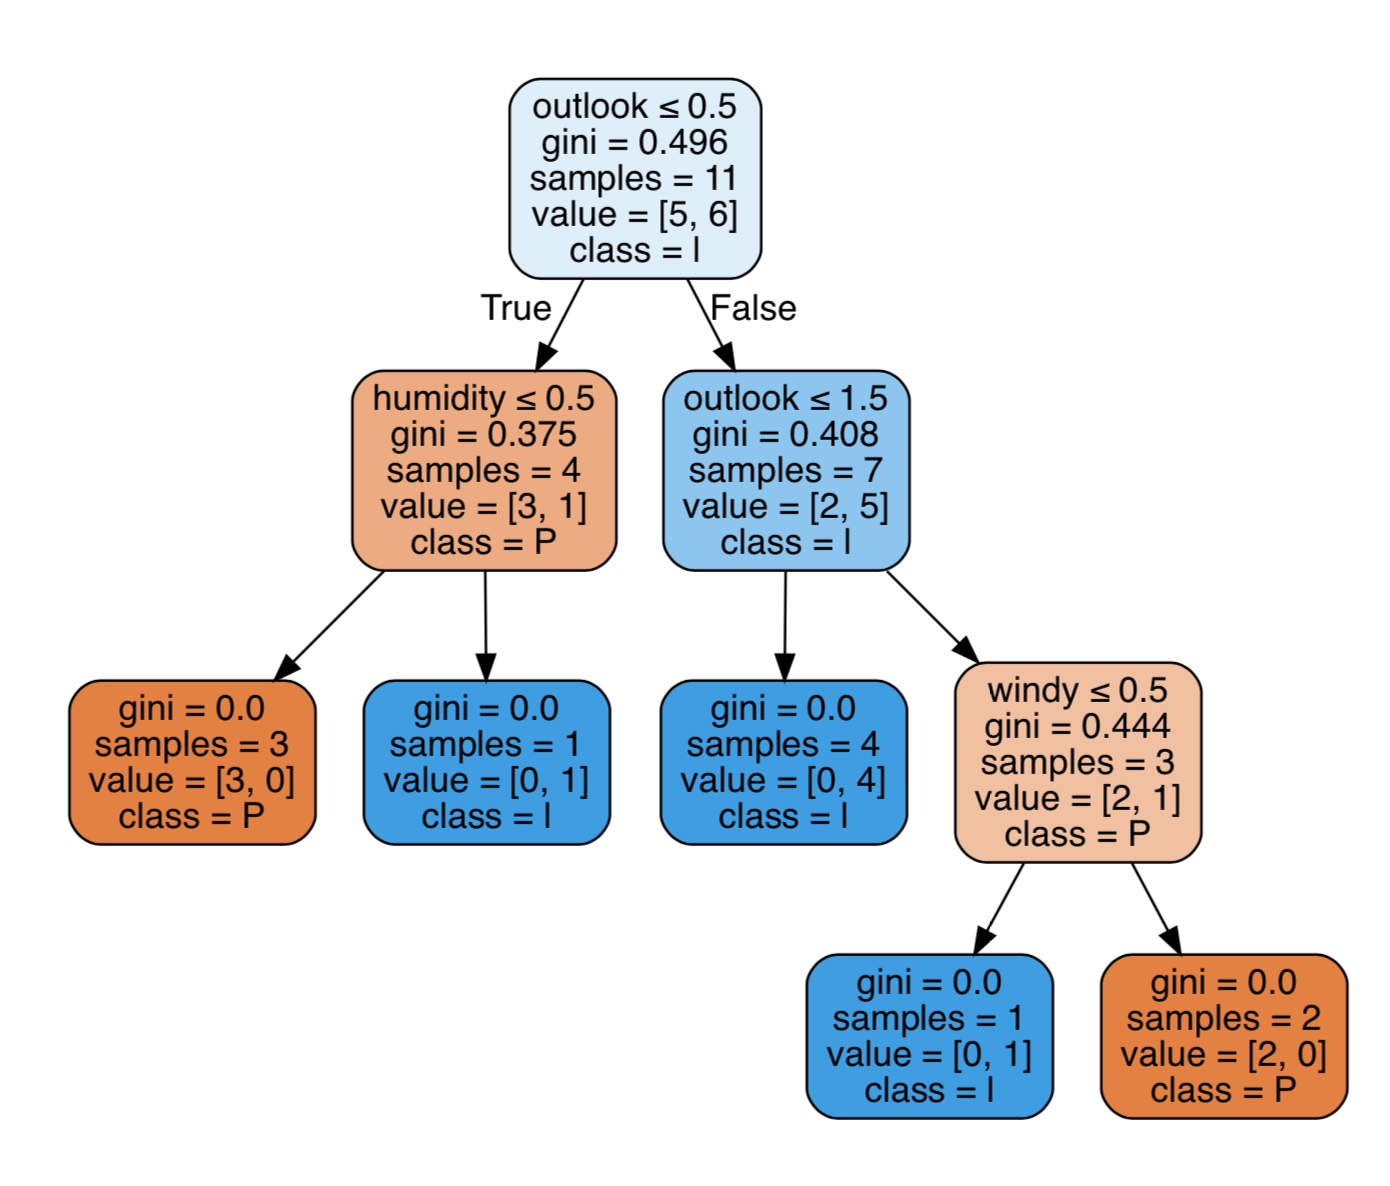

In [20]:
# entropy
from sklearn.tree import DecisionTreeClassifier

model_entropy = DecisionTreeClassifier(criterion="entropy")
model_entropy.fit(train_x,train_y)
# Testing
entropy_predtest_y=model_entropy.predict(test_x)
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(test_y,entropy_predtest_y)


0.6666666666666666